<br>
<div style="text-align: right; font-family: fantasy;">Jules Morris<br>October 2022</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# for mathematical operations
import numpy as np 

# for dataframe operations
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# lets select  a background style
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 7)

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

<h1 style="border-bottom: 10px groove blue; margin-top: 1px; margin-bottom: 1px">Data Acquisition</h1>

In [2]:
df = pd.read_csv("startup_funding.csv")
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


<h1 style="border-bottom: 10px groove blue; margin-top: 1px; margin-bottom: 1px">Data Preparation</h1>

In [3]:
#change column names
df.columns = ['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
             'City', 'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks']

df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


<h3 style = "border-bottom: 5px groove ivory; margin-top: 1px; margin-bottom: 1px">Missing Values</h3>

In [4]:
#calculate total missing values before cleaning strings
total = df.isnull().sum().sort_values(ascending = False)

#calculate percent of missing values
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)

#store values in df
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent %'])

missing_data

,Total,Percent %
Remarks,2625,86.235217
AmountInUSD,960,31.537451
SubVertical,936,30.749014
City,180,5.913272
IndustryVertical,171,5.617608
InvestorsName,24,0.788436
InvestmentType,4,0.131406
SNo,0,0.000000
Date,0,0.000000
StartupName,0,0.000000


In [5]:
#df.AmountInUSD.unique()

In [6]:
#create function to clean the strings
def clean_string(x):
    #invisible nonbreaking spaces (invisible characters) in UTF-8 encodings will be replaced w/ empty spaces
        #seen using: df.AmountInUSD.unique()
    return str(x).replace("\\xc2\\xa0", "").replace("\\\\xc2\\\\xa0", "")

#apply function to clean data
for col in ['StartupName', 'IndustryVertical', 'SubVertical', 'City', 
            'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks']:
    df[col] = df[col].apply(lambda x: clean_string(x))

df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [7]:
#check df shape
df.shape

(3044, 10)

<h1 style="border-bottom: 10px groove blue; margin-top: 1px; margin-bottom: 1px">Data Cleaning</h1>

In [8]:
#remove Remarks column due to high number of missing values
df = df.drop(['Remarks'], axis = 1)

#check column names
df.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

---

In [9]:
#convert amount column to numerical to analyze values

def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    #replace commas and plus sign with empty strings
    x = str(x).replace(",", "").replace("+", "")
    #replace undisclosed w/ empty strings
    x = str(x).lower().replace("undisclosed", "")
    #replace n/a w/ empty strings
    x = str(x).lower().replace("n/a", "")
    
    #if the amount is empty, replace w -999 value to show clear pattern of startups that did not receive 
        #any funding
    if x == '':
        x = '-999'
    return x
        
#apply function
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(clean_amount(x)))

<hr style="border-top: 5px groove lightsteelblue; margin-top: 1px; margin-bottom: 1px"></hr>

<function matplotlib.pyplot.show(close=None, block=None)>

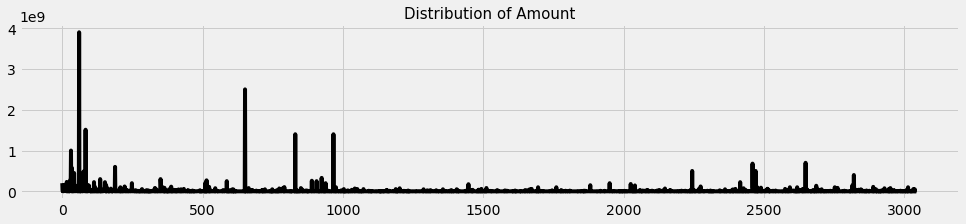

In [10]:
#visualize distribution of amount to ensure amount values are numerically converted
plt.rcParams['figure.figsize'] = (15, 3)
df['AmountInUSD'].plot(kind = 'line', color = 'black')
plt.title('Distribution of Amount', fontsize = 15)
plt.show

<hr style="border-top: 5px groove lightsteelblue; margin-top: 1px; margin-bottom: 1px"></hr>

In [11]:
df.Date.unique()

array(['09/01/2020', '13/01/2020', '02/01/2020', ..., '29/01/2015',
       '30/01/2015', '31/01/2015'], dtype=object)

In [12]:
#clean the dates
df['Date'][df['Date']=='12/05.2015'] = '12/05/2015'
df['Date'][df['Date']=='13/04.2015'] = '13/04/2015'
df['Date'][df['Date']=='15/01.2015'] = '15/01/2015'
df['Date'][df['Date']=='22/01//2015'] = '22/01/2015'
df['Date'][df['Date']=='05/072018'] = '05/07/2018'
df['Date'][df['Date']=='01/07/015'] = '01/07/2015'
df['Date'][df['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

# How does the Funding Ecosystem Change Over Time?

In [13]:
#convert to datetime object
df['yearmonth'] = (pd.to_datetime(df['Date'],
                                 format = '%d/%m/%Y').dt.year * 100) +(pd.to_datetime(df['Date'],
                                 format = '%d/%m/%Y').dt.month)
    
#sort values for number of fundings per month
temp = df['yearmonth'].value_counts().sort_values(ascending = False).head(10)

print('Number of funding per month in descending order(Top 10)\n', temp)

year_month = df['yearmonth'].value_counts()

Number of funding per month in descending order(Top 10)
 201601    104
201602    100
201507     98
201606     98
201508     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


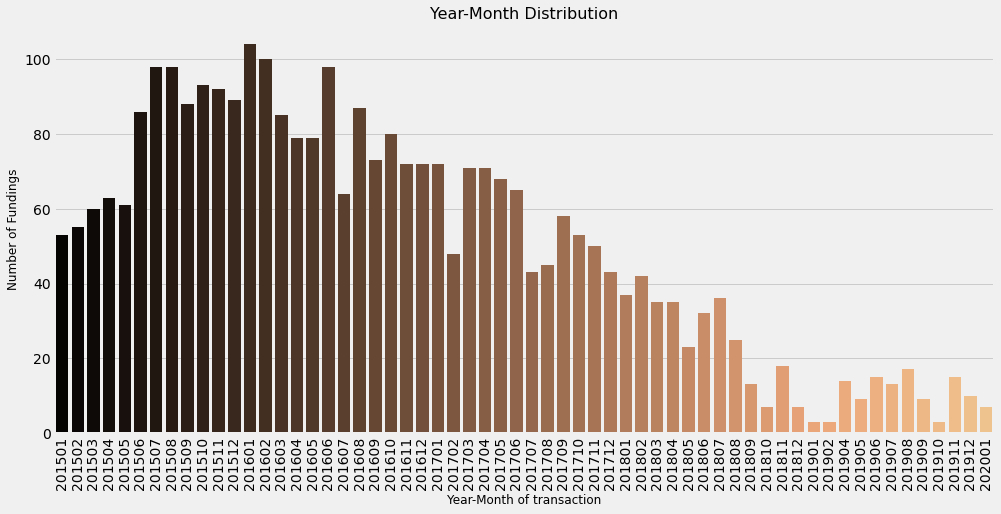

In [14]:
#plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(year_month.index, year_month.values, palette = 'copper')
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize = 12)
plt.ylabel('Number of Fundings', fontsize = 12)
plt.title('Year-Month Distribution', fontsize = 16)
plt.show()

- Highest number of fundings for Indian startups occur in January and February 2016, with a general decline in fundings from July 2016 onwards.

---

# What is the Average Funding Amount for Indian Startups?

In [15]:
#check max funding amount
print("Maximum funding given to a startup is: ", df['AmountInUSD'].dropna().sort_values().max())


Maximum funding given to a startup is:  3900000000.0


In [16]:
#check the startups with more than 50+ crore funding
@interact 

def check(column = 'AmountInUSD', x = 500000000): #50 crore funding
    return df[df[column] > x].sort_values(by = 'AmountInUSD', ascending = False)

interactive(children=(Text(value='AmountInUSD', description='column'), IntSlider(value=500000000, description=…

In [17]:
#Check different ventures of Paytm
df[df.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,-9.990000e+02,201503
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,201502


- Paytm has been funded by 7 investors

In [18]:
# Check minimum funding
print('Minimum funding given to a startup is: ', df['AmountInUSD'].dropna().sort_values().min())

Minimum funding given to a startup is:  -999.0


- Since -999 was the assigned value, we can conclude that there are some startups that received zero funding in this dataset.

In [21]:
# Check startups with the least amount of funding
df[['AmountInUSD', 'StartupName']].sort_values(by = 'AmountInUSD', ascending = True).head(5)

,AmountInUSD,StartupName
2125,-999.0,Splitkart
1464,-999.0,TAC Security
708,-999.0,FableStreet
709,-999.0,Monsoon Fintech
710,-999.0,MonkeyBox


- These startups have the least funding

In [22]:
#find the number of startups that received no funding in this dataset
df[df['AmountInUSD'] == -999.0].shape

(971, 10)

- There are 971 startups that received no funding in this dataset

In [23]:
# Check the funding that each startup received
print('Total startups funded: ', len(df['StartupName'].unique()))

print(df['StartupName'].value_counts().head(10))

#create variable for top 20 startups with highest amount of funding
startupname = df['StartupName'].value_counts().head(20)

Total startups funded:  2457
Ola Cabs     8
Swiggy       8
Paytm        7
UrbanClap    6
NoBroker     6
Medinfi      6
Nykaa        6
Meesho       6
Jugnoo       5
Grofers      5
Name: StartupName, dtype: int64


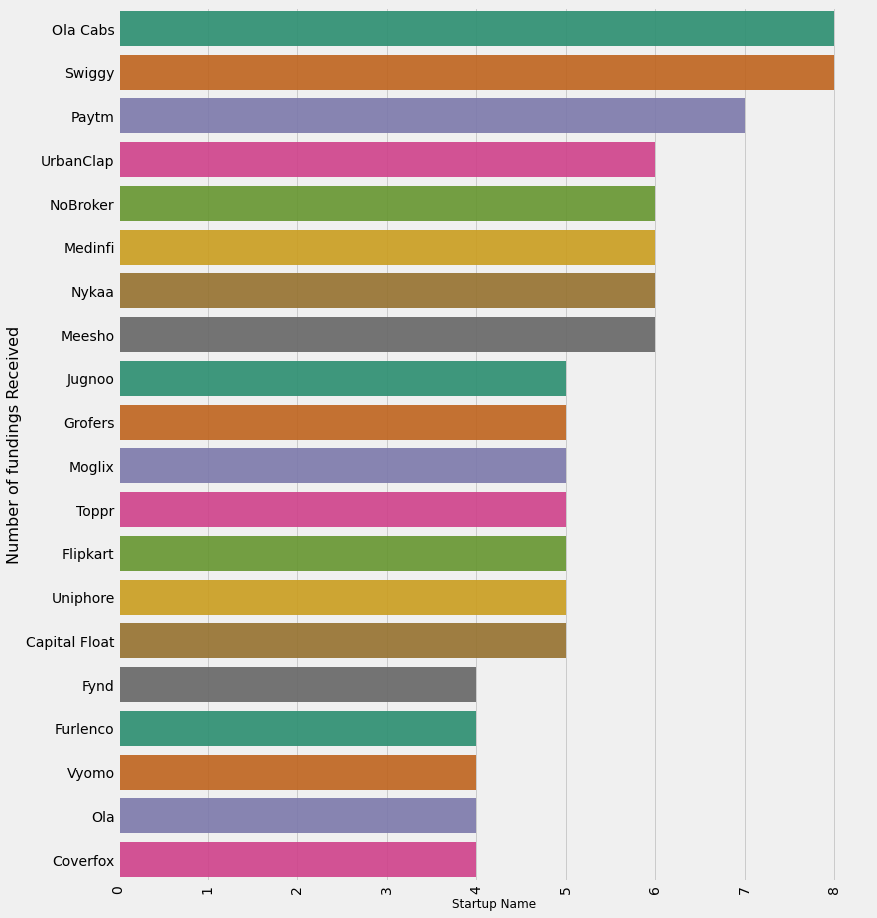

In [24]:
#plot the data
plt.rcParams['figure.figsize'] = (12, 15)
sns.barplot(y = startupname.index, x = startupname.values, alpha = 0.9, palette = 'Dark2')
plt.xticks(rotation = 'vertical')
plt.xlabel('Startup Name', fontsize = 12)
plt.ylabel('Number of fundings Received', fontsize = 16)
plt.show()

- Ola Cabs and Swiggy have been funded the most at eight times each.

# Which kind of Industries are more preferred for Startups?

In [25]:
# analyze the industry of startups


In [26]:
#data cleaning, replace 'nan' values w/ 'Consumer Technology'
df['IndustryVertical'] = df['IndustryVertical'].replace('nan', 'Consumer Technology')

#create variable for top 10 industries in this dataset
industry = df['IndustryVertical'].value_counts().head(10)
print(industry)

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: IndustryVertical, dtype: int64


Text(0.5, 1.0, 'Industry Vertical of Startups with Number of Fundings')

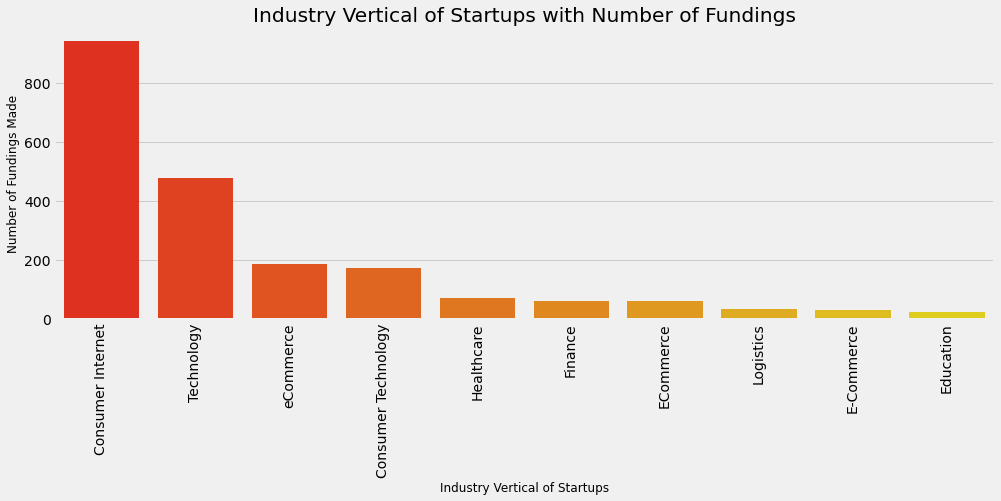

In [27]:
# plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation = 'vertical')
plt.xlabel('Industry Vertical of Startups', fontsize = 12)
plt.ylabel('Number of Fundings Made', fontsize = 12)
plt.title('Industry Vertical of Startups with Number of Fundings')

- Startups in the Consumer Internet industry are most frequently funded, with technology following second.

In [28]:
#analyse sub vertical industries
industry = df['SubVertical'].value_counts()[1:].head(20)

print(industry)

Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Online Learning Platform                          5
Online Education Platform                         5
Online Lending                                    5
Online lending platform                           5
Education                                         5
Online Food Delivery                              4
Non-Banking Financial Company                     4
Online Gifting platform                           3
B2B Marketplace                                   3
Online learning platform                          3
Online platform for Higher Education Services     3
Online Payment Gateway                            3
Online Furniture Store                            3
Online Insurance Aggregator                       3
Online Insurance Platform                         3
Agri-tech                                         3
SaaS        

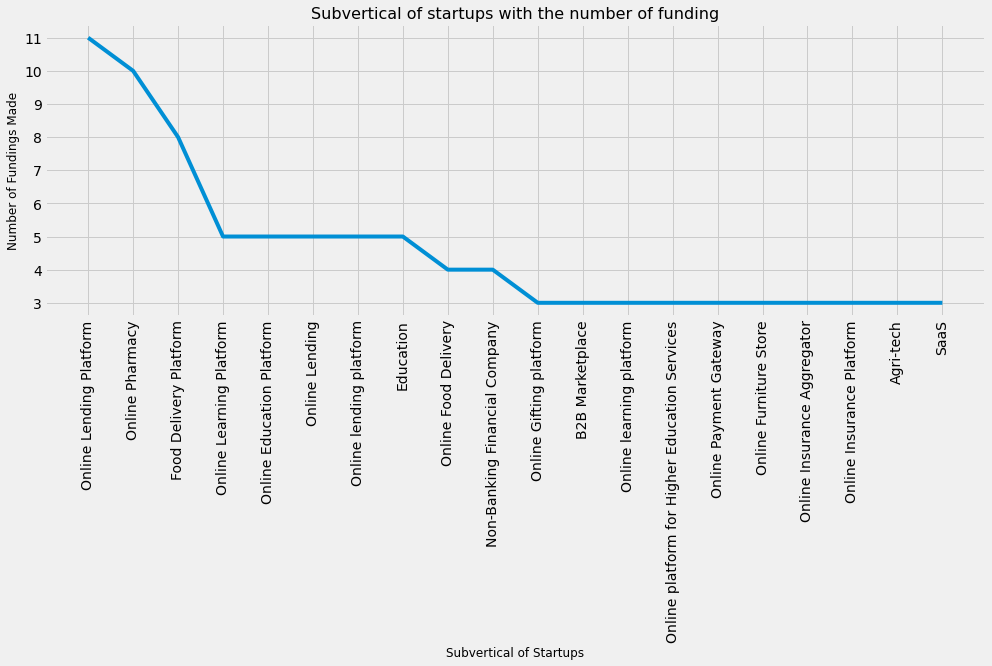

In [29]:
#plot the data
sns.lineplot(industry.index, industry.values, palette = 'winter')
plt.xticks(rotation = 'vertical')
plt.xlabel('Subvertical of Startups', fontsize = 12)
plt.ylabel('Number of Fundings Made', fontsize = 12)
plt.title('Subvertical of startups with the number of funding', fontsize = 16)
plt.show()

- Online lending platforms and online pharmacies are the most frequently funded subvertical industries

---

# Does Location also play a role, in determining the growth of a startup?

In [30]:
#analyse the effect of cities on a startup

#clean the data 
df['City'] = df['City'].replace(('Bengaluru', 'nan'), ('Bangalore', 'Bangalore'))

#create variable for top funded cities
city = df['City'].value_counts().head(10)
print(city)

Bangalore    1022
Mumbai        568
New Delhi     424
Gurgaon       291
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Gurugram       50
Ahmedabad      38
Name: City, dtype: int64


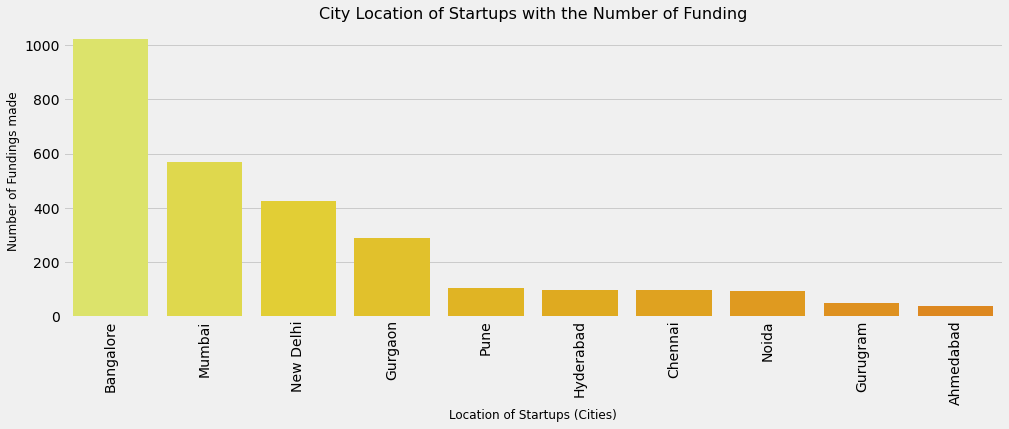

In [31]:
#plot the data
sns.barplot(city.index, city.values, palette = 'Wistia')
plt.xticks(rotation = 'vertical')
plt.xlabel('Location of Startups (Cities)', fontsize = 12)
plt.ylabel('Number of Fundings made', fontsize = 12)
plt.title('City Location of Startups with the Number of Funding', fontsize = 16)
plt.show()

- Most startup locations are in Bangalore
- Bangalore, Mumbai, and New Delhi represent 68% of startup locations

---

# Who plays the main role in Indian Startups Ecosystem?

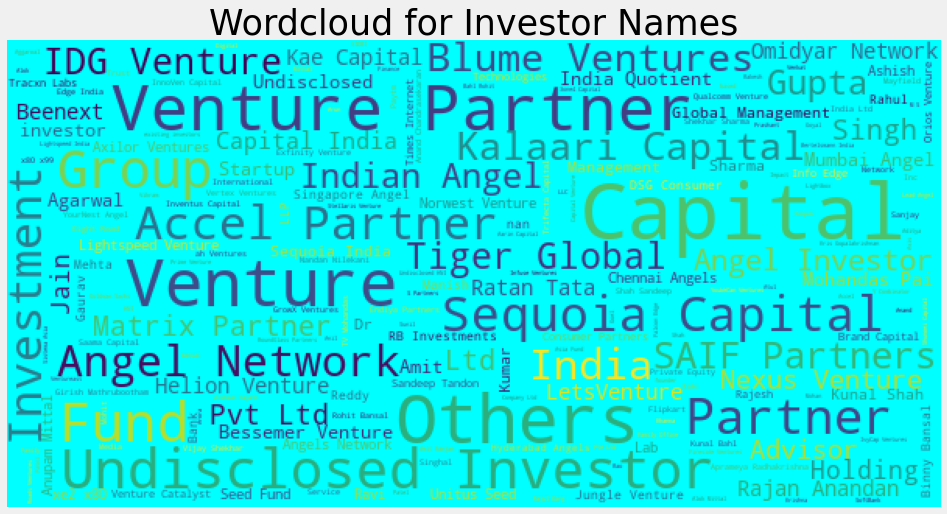

In [33]:
names = df['InvestorsName'][~pd.isnull(df['InvestorsName'])]

wordcloud = WordCloud(max_font_size = 50, width = 600, height = 300, background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.title('Wordcloud for Investor Names', fontsize = 35)
plt.axis('off')
plt.show()
                    